In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [128]:
df.shape

(7043, 21)

In [129]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**customerID column doesn't put any impact so we should remove this column**

In [130]:
df.drop('customerID',axis='columns',inplace=True)

In [131]:
df.shape

(7043, 20)

In [132]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**from dtypes we can see that TotalCharges is object,but it should be numeric,so we convert dtype for this column**

In [133]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**now we will check is there any empty value in this column**

In [134]:
(df['TotalCharges'].str.strip()=='').any()

True

**how many columns are there where has this empty values**

In [135]:
(df['TotalCharges'].str.strip()=='').sum()

11

In [136]:
pd.to_numeric(df['TotalCharges'],errors='coerce')   #by using errors='coerce' it ignore the reason of errors'

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [137]:
df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()].shape

(11, 20)

**these 11 rows containing ' ' as a value in TotalCharges column.So we remove these 11 rows**

In [138]:
df.shape

(7043, 20)

In [139]:
df=df[df['TotalCharges']!=' ']
df.shape

(7032, 20)

In [140]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**Now we convert object type column to numeric column**

In [141]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [145]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [146]:
(df['Churn']=='No').sum()

5163

In [147]:
(df['Churn']=='Yes').sum()

1869

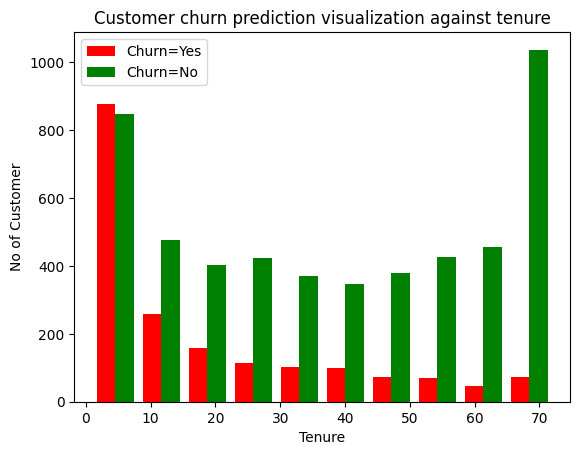

In [152]:
tenure_churn_no=df[df['Churn']=='No'].tenure
tenure_churn_yes=df[df['Churn']=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("No of Customer")
plt.title("Customer churn prediction visualization against tenure")

plt.hist([tenure_churn_yes,tenure_churn_no],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()